In [71]:
import pandas as pd
dataSet = pd.read_csv("Social_Network_Ads.csv")
dataSet

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [72]:
# dummy Variable
dataSet =  pd.get_dummies(dataSet, columns=["Gender"])

# delete User ID
dataSet = dataSet.drop(columns=["User ID"])
dataSet

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19.0,19000.0,0,0,1
1,35.0,20000.0,0,0,1
2,26.0,43000.0,0,1,0
3,27.0,57000.0,0,1,0
4,19.0,76000.0,0,0,1
...,...,...,...,...,...
395,46.0,41000.0,1,1,0
396,51.0,23000.0,1,0,1
397,50.0,20000.0,1,1,0
398,36.0,33000.0,0,0,1


In [73]:
from sklearn.preprocessing import StandardScaler
Standard = StandardScaler()
dataSet_standard = Standard.fit_transform(dataSet.iloc[:, 0:2])
dataSet.iloc[:, 0:2] = dataSet_standard
dataSet

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,-1.781797,-1.490046,0,0,1
1,-0.253587,-1.460681,0,0,1
2,-1.113206,-0.785290,0,1,0
3,-1.017692,-0.374182,0,1,0
4,-1.781797,0.183751,0,0,1
...,...,...,...,...,...
395,0.797057,-0.844019,1,1,0
396,1.274623,-1.372587,1,0,1
397,1.179110,-1.460681,1,1,0
398,-0.158074,-1.078938,0,0,1


In [77]:
IndependentV = dataSet.iloc[:, [0, 1]].values
dependentV = dataSet.iloc[:, 2].values

from sklearn.model_selection import train_test_split
IndependentV_train, IndependentV_test, dependentV_train, dependentV_test = train_test_split(IndependentV, dependentV, test_size=0.2, random_state=0)

In [78]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(IndependentV_train, dependentV_train)

LogisticRegression(random_state=0)

In [79]:
predict = model.predict(IndependentV_test)

correct=0

for i in range(0, len(predict)):
    if dependentV_test[i] == predict[i]:
        correct+=1

print("correct_rate = ", correct/len(predict)*100, "%")


correct_rate =  92.5 %


In [80]:
from sklearn.metrics import confusion_matrix
confusionM = confusion_matrix(dependentV_test, predict)
confusionM

array([[57,  1],
       [ 5, 17]], dtype=int64)

C:\Users\maxt7\AppData\Local\Temp\ipykernel_34044\3219368784.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == modelPredict, 0], X_set[y_set == modelPredict, 1],


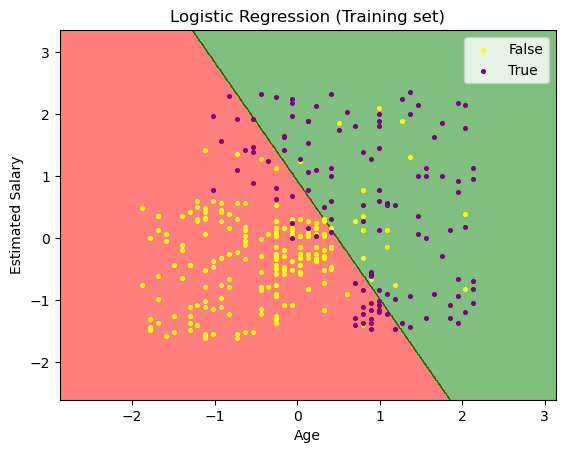

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_set, y_set = IndependentV_train, dependentV_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max()+1, step=0.01),
                     np.arange(start = X_set[:, 1].min()-1, stop = X_set[:, 1].max()+1, step=0.01))


plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

typelist = ["False","True"]
for index, modelPredict in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == modelPredict, 0], X_set[y_set == modelPredict, 1],
                c = ListedColormap(('yellow', 'purple'))(index), label = typelist[modelPredict], s=7)


plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\maxt7\AppData\Local\Temp\ipykernel_34044\1665523299.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == modelPredict, 0], X_set[y_set == modelPredict, 1],


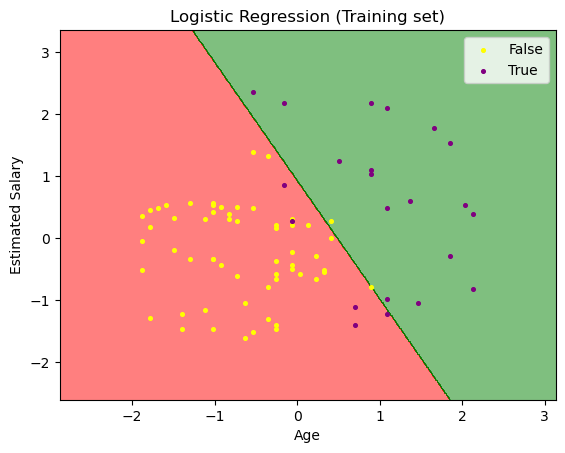

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_set, y_set = IndependentV_test, dependentV_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max()+1, step=0.01),
                     np.arange(start = X_set[:, 1].min()-1, stop = X_set[:, 1].max()+1, step=0.01))


plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

typelist = ["False","True"]
for index, modelPredict in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == modelPredict, 0], X_set[y_set == modelPredict, 1],
                c = ListedColormap(('yellow', 'purple'))(index), label = typelist[modelPredict], s=7)


plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()